/var/folders/fg/w2t7p9sx1_s43rj6b6h5mdqw0000gn/T/ipykernel_1157/231047908.py:51: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpio" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig('Root Find.jpeg',dpio=300,bbox_inches='tight') #save figure as a *jpeg


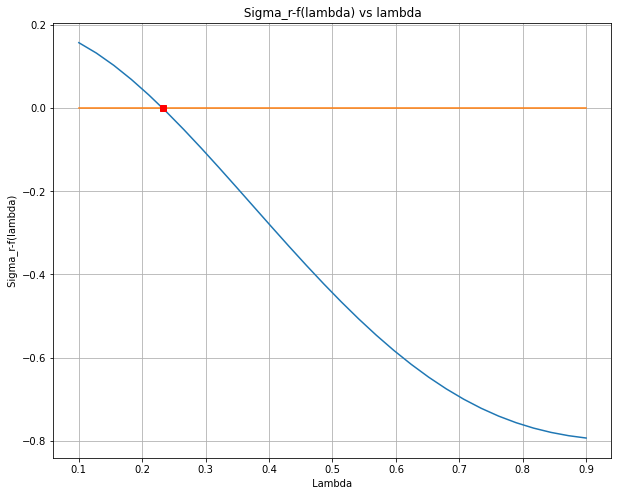

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve 
import pandas as pd
#
#
a = 100.0 #solute radius in nm
sigmar = 0.2 #fraction reflected 
guess = 0.9 #guess 
sigfigs = 3
rpore0 = a/guess
# 
def g(x): #define a function of g 
    kpore = (1-x)**2
    term3 = 1 -(2/3)*x**2-0.163*x**3
    y = sigmar - (1-kpore*(2-kpore)*term3)
    return y
#
x_root = fsolve(g,guess)
rpore = a/x_root
y_guess = g(guess)
y_val = g(x_root)

L_rpore = ['%.*e'% (sigfigs-1,rpore0)]
L_values= ['%.*e'% (sigfigs-1,guess)]
L_values.append('%.*e'% (sigfigs-1,x_root[0]))
glam_values = ['%.*e'% (sigfigs-1,y_guess)]
glam_values.append('%.*e'% (sigfigs-1,y_val[0]))              
L_rpore.append('%.*e'% (sigfigs-1,rpore[0]))

L_index = [' guess ', ' fsolve ']
                   
result_dictionary = {'x values':L_values,'g(lambda)':glam_values, 'R_pore':L_rpore}
df_root = pd.DataFrame(result_dictionary) 
df_root.index = L_index

                   
#print("The value for lambda =: %7.3f , for a sigma_r of: %7.3f" % (x_root,sigmar))
#print("The pore radius =: %.*e nm" %(sigfigs-1,rpore)

x = np.linspace(0.1,0.9,30)
#
fig= plt.figure(figsize=(10,8)) #create a figure size 
plt.plot(x,g(x))
plt.plot(x,np.zeros(len(x)))
plt.grid(True)
plt.plot(x_root, g(x_root), 'rs')
plt.title(" Sigma_r-f(lambda) vs lambda ")
plt.xlabel(' Lambda ')
plt.ylabel(' Sigma_r-f(lambda) ')
fig.savefig('Root Find.jpeg',dpio=300,bbox_inches='tight') #save figure as a *jpeg

f = open('Root_Find.csv','w',newline = '')
df_root.to_csv(f)
f.close()




In [93]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve 
import pandas as pd
import math
import scipy as sci
#
#Del Squared 
a = 100.0 #solute radius in nm
sigmar = 0.2 #fraction reflected 
x0 = 0.9 #guess 
sigfigs = 3
epsilon= .0001 #setting a tolerance 
tol = 10
count = 1

l_count = []
R_pore = []
L_count_pore = []

def g(x): #define a function of g 
    kpore = (1-x)**2
    term3 = 1 -(2/3)*x**2-0.163*x**3
    z = 1 - ((1-sigmar)/(2-kpore)*term3)**(1/2)
    return z

def gprim(y0,y1,y2):
    return (y2-y1)/(y1-y0)

while tol > epsilon:
    x1 = g(x0)
    x2 = g(x1)
    gp = gprim(x0,x1,x2)
    xdel = x2 + (gp/(1-gp))*(x2-x1)
    tol = abs(xdel-x0)/xdel
    x0 = xdel
    Rpore = a/xdel
    R_pore.append('%.*e'% (sigfigs-1,Rpore))
    l_count.append('%d'% (count))
    L_count_pore.append('%d %.*e'% (count,sigfigs-1,Rpore))
    count += 1



/var/folders/fg/w2t7p9sx1_s43rj6b6h5mdqw0000gn/T/ipykernel_1157/3684979824.py:34: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpio" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig('Root Find.jpeg',dpio=300,bbox_inches='tight') #save figure as a *jpeg


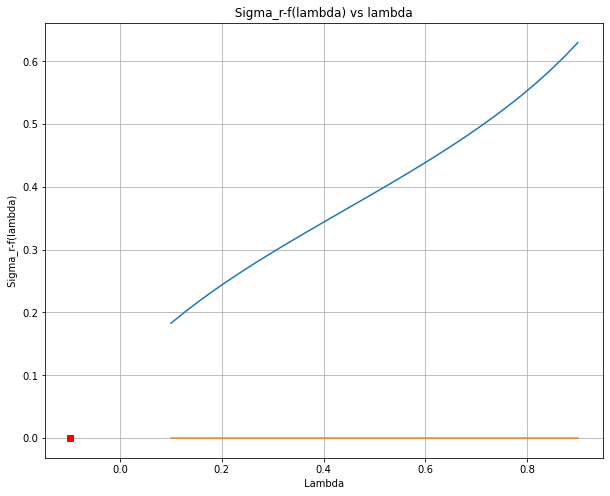

In [89]:
#
x_root = fsolve(g,guess)
rpore = a/x_root
y_guess = g(guess)
y_val = g(x_root)

L_rpore = ['%.*e'% (sigfigs-1,rpore0)]
L_values= ['%.*e'% (sigfigs-1,guess)]
L_values.append('%.*e'% (sigfigs-1,x_root[0]))
glam_values = ['%.*e'% (sigfigs-1,y_guess)]
glam_values.append('%.*e'% (sigfigs-1,y_val[0]))              
L_rpore.append('%.*e'% (sigfigs-1,rpore[0]))

L_index = [' guess ', ' fsolve ']
                   
result_dictionary = {'x values':L_values,'g(lambda)':glam_values, 'R_pore':L_rpore}
df_root = pd.DataFrame(result_dictionary) 
df_root.index = L_index

                   
#print("The value for lambda =: %7.3f , for a sigma_r of: %7.3f" % (x_root,sigmar))
#print("The pore radius =: %.*e nm" %(sigfigs-1,rpore)

x = np.linspace(0.1,0.9,30)
#
fig= plt.figure(figsize=(10,8)) #create a figure size 
plt.plot(x,g(x))
plt.plot(x,np.zeros(len(x)))
plt.grid(True)
plt.plot(x_root, g(x_root), 'rs')
plt.title(" Sigma_r-f(lambda) vs lambda ")
plt.xlabel(' Lambda ')
plt.ylabel(' Sigma_r-f(lambda) ')
fig.savefig('Root Find.jpeg',dpio=300,bbox_inches='tight') #save figure as a *jpeg

f = open('Root_Find.csv','w',newline = '')
df_root.to_csv(f)
f.close()




TypeError: 'str' object is not callable